# Classification With Neural Netoworks

An introduction to classification with neural networks. A **classification** is a type of machine learning problem where we try to predict discrete valued outputs. The labels corresponding to the data are a set of values and are not continuous in nature. For example showing an image of an animal and trying to guess whether it is a dog or a cat is an example of classification.  

> For a given set of inputs predicting whether the house will get sold or not is a classification problem whereas trying to predict the selling price of the house for the same set of inputs is a regression problem. When it's a classification problem, the outputs are - Yes/No whereas when it's a regression problem the outputs are real valued numbers within some range

## Common Types Of Classification

- #### Binary Classification
Here the output is two values (yes/no, 0/1, white/black etc). Each training instance can have one of the two possible outputs

- #### Multiclass Classification
Here the output is $n$ values. Each training instance can belong to one of the n-classes being predicted. For example trying to predict the species of a dog

- #### Multilabel Classification
Here the output has $n$ values but each training instance can have $1$ or upto $n$ classes. For example predicting facial features for pictures of people the classes associated with one photo maybe *fair, bald, middle-aged* whereas with other one it will be *injured, scars, female, young* etc.

#### Import Required Libraries

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt

## Working With A Dummy Dataset

Create circles dataset using sklearn

In [15]:
from sklearn.datasets import make_circles

# generate 1000 samples
n_samples = 1000

# generate circles data
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [16]:
# look at the generated data
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [17]:
# convert the data into pandas dataframe
circles = pd.DataFrame({"x0": X[:, 0], "x1": X[:, 1], "y": ['blue' if label == 0 else 'red' for label in y]})
circles.head(10)

,x0,x1,y
0,0.754246,0.231481,red
1,-0.756159,0.153259,red
2,-0.815392,0.173282,red
3,-0.393731,0.692883,red
4,0.442208,-0.896723,blue
5,-0.479646,0.676435,red
6,-0.013648,0.803349,red
7,0.771513,0.147760,red
8,-0.169322,-0.793456,red
9,-0.121486,1.021509,blue


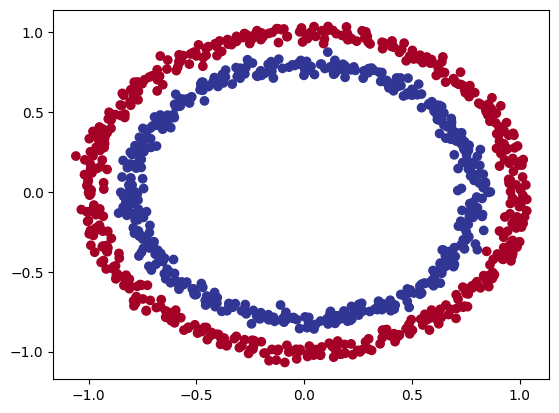

In [18]:
# visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [19]:
# check the shape of the data
X.shape, y.shape

((1000, 2), (1000,))

## Working With The Generated Data

Create some neural network models and train them on the generated dataset. Ideally, a well trained model will be able to create a classifier that can accurately predict a **red** or **blue** circle. Such a model will also be able to generate a highly accurate decision boundary that can separate the blue circles from the red ones visually.

In [20]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['accuracy']
)

In [21]:
# train the model for 10 epochs
history = model.fit(X, y, epochs=15)

Epoch 1/15
10/32 [========>.....................] - ETA: 0s - loss: 0.7240 - accuracy: 0.4594

2023-01-18 13:44:28.515158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 7ms/step - loss: 0.6961 - accuracy: 0.5040
Epoch 2/15
32/32 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.6150
Epoch 3/15
32/32 [==============================] - 0s 6ms/step - loss: 0.6514 - accuracy: 0.6360
Epoch 4/15
32/32 [==============================] - 0s 6ms/step - loss: 0.6133 - accuracy: 0.6730
Epoch 5/15
32/32 [==============================] - 0s 6ms/step - loss: 0.5720 - accuracy: 0.8030
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 0.5285 - accuracy: 0.8680
Epoch 7/15
32/32 [==============================] - 0s 7ms/step - loss: 0.4814 - accuracy: 0.9120
Epoch 8/15
32/32 [==============================] - 0s 6ms/step - loss: 0.4310 - accuracy: 0.9600
Epoch 9/15
32/32 [==============================] - 0s 6ms/step - loss: 0.3774 - accuracy: 0.9860
Epoch 10/15
32/32 [==============================] - 0s 6ms/step - loss: 0.3505 - accuracy: 0.9520
Epoch 11/15
32/32 [===========

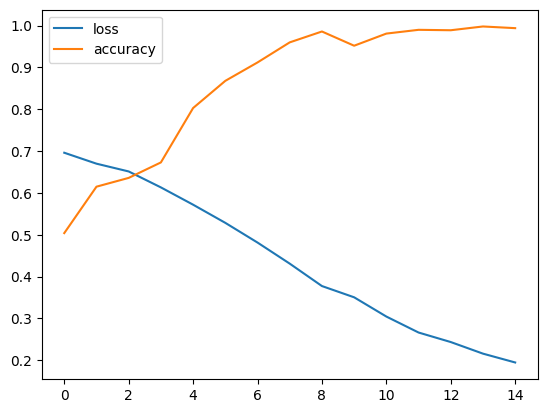

In [22]:
# visualize the training loss vs accuracy
pd.DataFrame(history.history).plot()
plt.show()

### Plotting The Decision Boundary

A function that we can call on any model predictions to visualize the decision boundary calculated by the model. This gives a visual idea of how good the model is and what is the meaning of the accuracy of the model

#### Key Steps In Plotting The Decision Boundary

- Take a trained model with features **X** and labels **y**
- Create a meshgrid of the different **X** values
- Make predictions using the meshgrid data
- Plot the predictions as well as a line between the zones

In [23]:
def plot_decision_boundary(model, X, y):
    
    # define the axis boundaries of the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # create a meshgrid from the axis boundaries
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # generate x values for making predictions
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # make predictions
    y_pred = model.predict(x_in)
    
    # logic to make the function re-usable across multi-class classification
    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

 98/313 [========>.....................] - ETA: 0s

2023-01-18 13:44:38.903792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


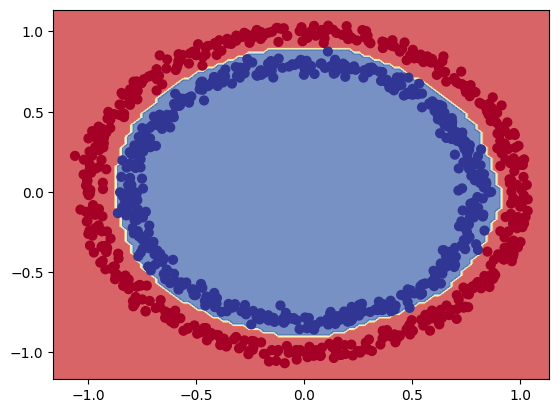

In [24]:
# plot the decision boundary of the model
plot_decision_boundary(model, X, y)

### Creating Our Own Non-Linear Function

In [25]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

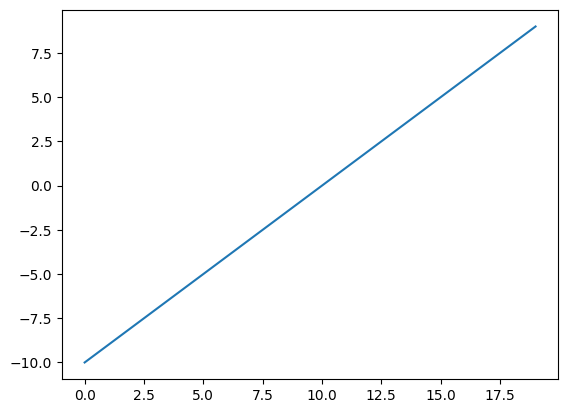

In [26]:
# visualize the tensor
plt.plot(A)

In [38]:
# replicating the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# replicating the ReLU activation function
def relu(x):
    return tf.maximum(0, x)

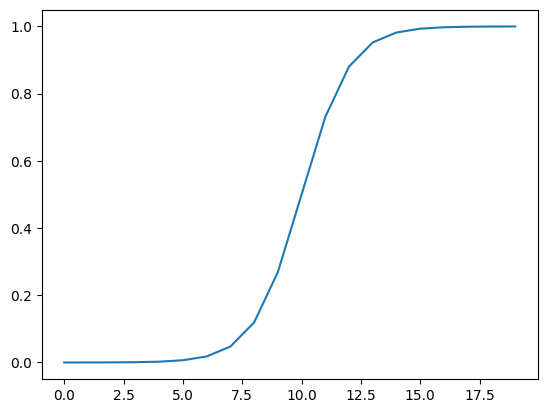

In [43]:
plt.plot(sigmoid(A))

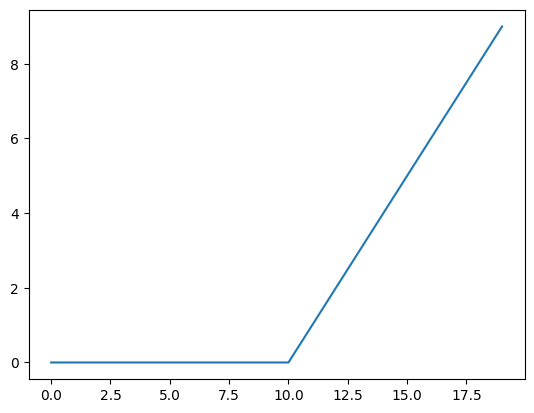

In [44]:
plt.plot(relu(A))

### Finding The Best Learning Rate

The ideal learning rate is the one where the loss decreases the most during training. To find the ideal learning rate the following steps can have to be used:

- Use learning rate **callback** - a callback is an extra bit of functionality that we can add to the model while the model trains
- Use another model
- A modified loss curve plot

In [45]:
tf.random.set_seed(42)

In [46]:
# create the model
_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy']
)

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
_history = _model.fit(X, y, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
19/32 [================>.............] - ETA: 0s - loss: 0.7034 - accuracy: 0.4901

2023-01-18 16:24:22.906275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 7ms/step - loss: 0.7027 - accuracy: 0.4960 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.5020 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6999 - accuracy: 0.5040 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6986 - accuracy: 0.4960 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6964 - accuracy: 0.4880 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.4980 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.4910 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6929 - ac

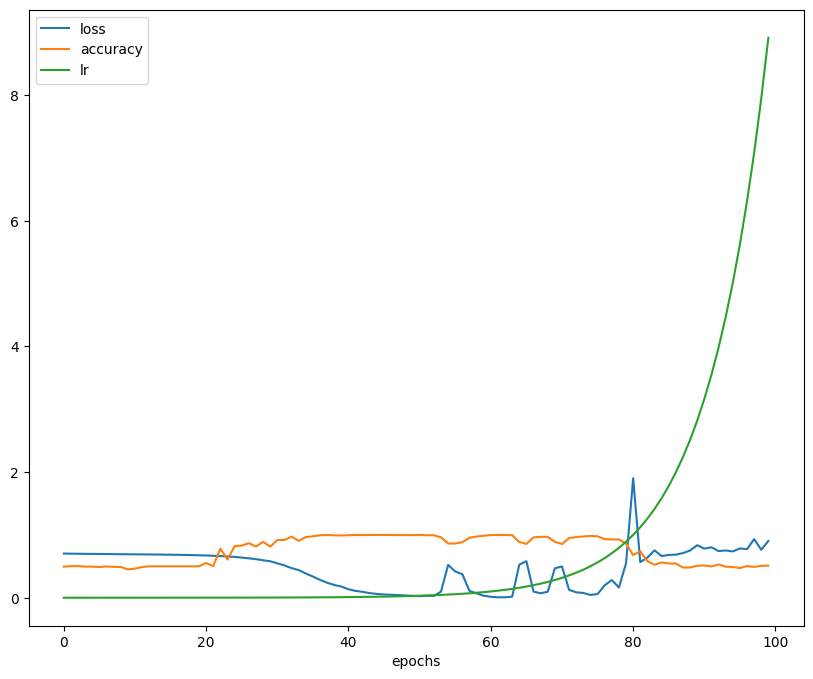

In [48]:
# plot the history curve
pd.DataFrame(_history.history).plot(figsize=(10,8), xlabel='epochs')
plt.show()

In [52]:
learning_rates = 1e-4 * (10 ** (tf.range(100)/20))
learning_rates.shape

TensorShape([100])

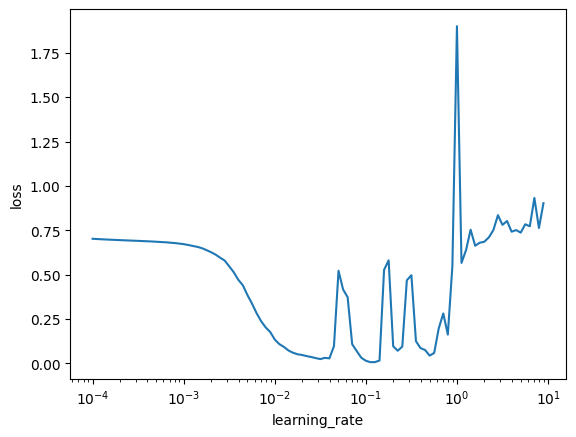

In [57]:
plt.semilogx(learning_rates, _history.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.show()

In [58]:
tf.random.set_seed(42)

In [60]:
# create the model
_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model with higher learning rate
_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

# fit the model
_history = _model.fit(X, y, epochs=10)

Epoch 1/10
18/32 [===============>..............] - ETA: 0s - loss: 0.6976 - accuracy: 0.5226

2023-01-18 17:01:47.452999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 7ms/step - loss: 0.6830 - accuracy: 0.5530
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.7020
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5471 - accuracy: 0.7990
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4430 - accuracy: 0.8500
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.3046 - accuracy: 0.9710
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.2216 - accuracy: 0.9780
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.1556 - accuracy: 0.9940
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 0.1068 - accuracy: 0.9980
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 0.0865 - accuracy: 0.9970
Epoch 10/10
32/32 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9990


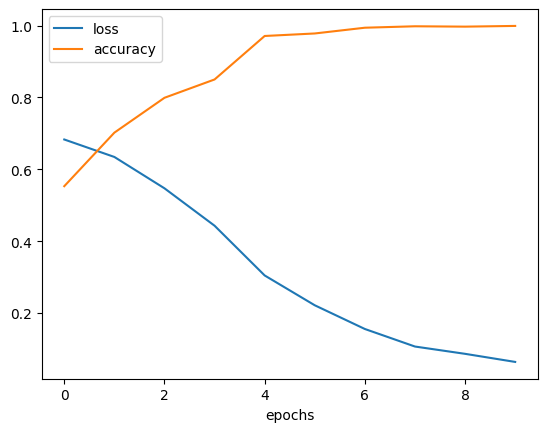

In [69]:
pd.DataFrame(_history.history).plot(xlabel='epochs')
plt.show()

In [76]:
results = history.history
_results = _history.history

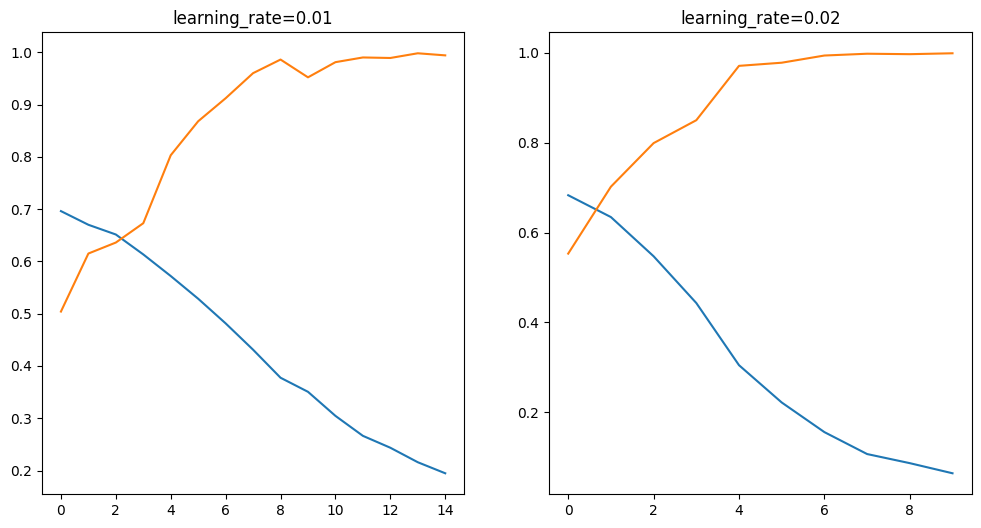

In [81]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(results['loss'])
plt.plot(results['accuracy'])
plt.title('learning_rate=0.01')

plt.subplot(1,2,2)
plt.plot(_results['loss'])
plt.plot(_results['accuracy'])
plt.title('learning_rate=0.02')

plt.show()